#  /Laptops

In [1]:
import json,pandas,glob #Appending all the products info from multiple JSON files to single dataframe
import os.path

read_files = glob.glob("Data/laptops/*.json")
Final_Laptops = pandas.DataFrame()
for i in range(0,len(read_files)):
    with open(read_files[i], 'rb') as x:
        JSONFILE = json.load(x)
    prod = JSONFILE['ProductInfo']
    Review = JSONFILE['Reviews']
    #d1.append(prod)
    #d2.append(Review)
    Reviews = pandas.DataFrame(Review)
    Products = pandas.DataFrame(prod, index = Reviews.index)
    merge = pandas.concat([Reviews, Products.ProductID, Products.Name], axis=1,join = 'inner')
    Final_Laptops = pandas.concat([Final_Laptops,merge])
    
Final_Laptops.head()

,Author,Content,Date,Name,Overall,ProductID,ReviewID,Title
0,"Walt Baty ""Walt 0000""","Google is on to something here, but without a ...","January 10, 2012",None,5.0,1440490899,RUSGOFLB5XRWR,The most underrated and un-hyped new system
1,"Poor Audiophile ""Poor Audiophile""",This is a great intro. to the subject of Chrom...,"January 30, 2012",None,5.0,1440490899,RAM6A980S6YMK,Excellent!!
2,"William B. Rodgers ""peterodgers""",not just a how to book but more about: 1. wher...,"December 17, 2011",None,5.0,1440490899,R1DP7TCV8WOPMA,important chromebook resource
3,Snowbirds,I have experience with almost every OS out the...,"September 23, 2012",None,5.0,1440490899,R212K0UDHZY44A,Could be a life changer
4,KWL,Disappointed. I bought this after I got my AR...,"December 4, 2012",None,1.0,1440490899,R6GIPSHI7QUUY,Not useful if you know about the Internet


In [2]:
Final_DF = Final_Laptops.set_index('ProductID')

In [3]:
Final_DF_notnull = Final_DF[Final_DF['Name'].notnull()]

In [4]:
Final_DF_null = Final_DF[Final_DF['Name'].isnull()]

In [5]:
from textblob import TextBlob, Word

x = TextBlob(Final_DF.Content[0])

p_of_s = x.tags #parts of speech tags

len(x.words) #word count

x.sentiment #shows pos and neg score

Sentiment(polarity=0.5541666666666667, subjectivity=0.6111111111111112)

In [6]:
Final_DF_notnull.Title.head()

ProductID
B00005RI8P            Basic 500 MHz iBook
B00005RI8P                           poor
B00005RI8P    HOW TO OPERATE THIS LAPTOP.
B00005RI8P          My Favorite Computer!
B00005RI8P                 Great Computer
Name: Title, dtype: object

In [7]:
Final_DF_notnull.count()

Author      20642
Content     20666
Date        20669
Name        20670
Overall     20670
ReviewID    20670
Title       20670
dtype: int64

In [8]:
Final_DF_Names = Final_DF_notnull.Name.str.lower()
Final_DF_Names[:5]

ProductID
B00005RI8P    apple ibook laptop (600-mhz powerpc g3, 128 mb...
B00005RI8P    apple ibook laptop (600-mhz powerpc g3, 128 mb...
B00005RI8P    apple ibook laptop (600-mhz powerpc g3, 128 mb...
B00005RI8P    apple ibook laptop (600-mhz powerpc g3, 128 mb...
B00005RI8P    apple ibook laptop (600-mhz powerpc g3, 128 mb...
Name: Name, dtype: object

In [9]:
Makes = Final_DF_Names.str.split().str.get(0)

Makes_DF = Makes.to_frame('Make')

Makes_DF[:5]

,Make
ProductID,
B00005RI8P,apple
B00005RI8P,apple
B00005RI8P,apple
B00005RI8P,apple
B00005RI8P,apple


In [10]:
df_make = pandas.concat([Final_DF_notnull, Makes_DF],axis = 1, join_axes=[Final_DF_notnull.index])

In [11]:
top10 = df_make['Make'].value_counts()[:10]

top10.to_frame('Count')

,Count
asus,3987
apple,3810
acer,2630
hp,2307
samsung,1890
dell,1841
lenovo,1328
toshiba,1014
sony,859
gateway,198


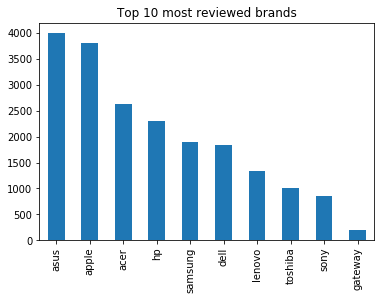

In [12]:
import matplotlib.pyplot as plt

top10.plot(x = 'index', y = 'Count', kind = 'bar')
plt.title("Top 10 most reviewed brands")
plt.show()

In [13]:
pwd

u'/Users/balaram_remala/Documents/GitHub/CORPUS/Project_Balaram'

In [14]:
df_make.to_pickle(path = '/Users/balaram_remala/Documents/GitHub/CORPUS/Project_Balaram/Data/Laptops_DataFrame', compression = None)

In [15]:
#from wordcloud import WordCloud, STOPWORDS

#word_count = WordCloud().generate(' '.join(top10.Count))

#plt.imshow(word_cloud)
#plt.axis('off')
#plt.show()

## Applying NaiveBayes Classification on Reviews to get Positive/Negative

In [16]:
neg_words = pandas.read_csv('Data/words/negative-words.txt',encoding='utf-8')
neg_words['Tag'] = 'Negative'
pos_words = pandas.read_csv('Data/words/positive-words.txt',encoding='utf-8')
pos_words['Tag'] = 'Postive'
neu_words = pandas.read_csv('Data/words/neutral-words.txt',encoding='utf-8')
neu_words['Tag'] = 'Neutral'
neg_words.to_csv('Data/neg_words.csv', index = None)
pos_words.to_csv('Data/pos_words.csv', index = None)
neu_words.to_csv('Data/neu_words.csv', index = None)

In [17]:
import glob

read_files = glob.glob("Data/*.csv")

with open("wordlist.csv", "wb") as outfile:
    for f in read_files:
        with open(f, "rb") as infile:
            outfile.write(infile.read())

In [18]:
from textblob.classifiers import NaiveBayesClassifier

with open('wordlist.csv', 'r') as fp:
     cl = NaiveBayesClassifier(fp, format="csv")

In [20]:
sample = df_make.Title.str.lower()
for i in range(10):
    print(cl.classify(sample[i])+ "---\t----" +sample[i])

Negative---	----basic 500 mhz ibook
Negative---	----poor
Neutral---	----how to operate this laptop.
Postive---	----my favorite computer!
Postive---	----great computer
Neutral---	----apple ibook laptop
Postive---	----the perfect compromise
Postive---	----best light notebook
Postive---	----best portable computer on the market
Negative---	----don't buy an ibook this slow


In [41]:
global replacements
replacements = {  
    "aren't" : "are not",
    "can't" : "cannot",
    "couldn't" : "could not",
    "didn't" : "did not",
    "doesn't" : "does not",
    "don't" : "do not",
    "dont" : "do not",
    ":)" : "good",
    "=)" : "good",
    ":(" : "bad",
    "hadn't" : "had not",
    "hasn't" : "has not",
    "haven't" : "have not",
    "he'd" : "he would",
    "he'll" : "he will",
    "he's" : "he is",
    "i'd" : "I would",
    "i'd" : "I had",
    "gr8" : "great",
    "gud":"good",
    "i'll" : "I will",
    "i'm" : "I am",
    "isn't" : "is not",
    "it's" : "it is",
    "it'll":"it will",
    "i've" : "I have",
    "let's" : "let us",
    "mightn't" : "might not",
    "mustn't" : "must not",
    "shan't" : "shall not",
    "she'd" : "she would",
    "she'll" : "she will",
    "she's" : "she is",
    "shouldn't" : "should not",
    "that's" : "that is",
    "there's" : "there is",
    "they'd" : "they would",
    "they'll" : "they will",
    "they're" : "they are",
    "they've" : "they have",
    "we'd" : "we would",
    "we're" : "we are",
    "weren't" : "were not",
    "we've" : "we have",
    "what'll" : "what will",
    "what're" : "what are",
    "what's" : "what is",
    "what've" : "what have",
    "where's" : "where is",
    "who'd" : "who would",
    "who'll" : "who will",
    "who're" : "who are",
    "who's" : "who is",
    "who've" : "who have",
    "won't" : "will not",
    "wouldn't" : "would not",
    "you'd" : "you would",
    "you'll" : "you will",
    "you're" : "you are",
    "you've" : "you have",
    "'re": " are",
    "wasn't": "was not",
    "we'll": "will",
    "didn't": "did not",
    "luv" : "love",    
    "r" : "are",  
    "u" : "you",
    "v" : "we",
    "gonna" : "going to",
    "lappy": "laptop",
    "da" : "the",
    "toppa da line":"top of the line",
    "dis" : "this",
    "osm" : "awesome"
    }

In [53]:
def get_tag(Title):
    s2 = ' '.join([replacements.get(w, w) for w in Title.lower().split()])
    return cl.classify(s2)

df_make["Tag"] = df_make.Title.apply(get_tag)

In [54]:
df_make

,Author,Content,Date,Name,Overall,ReviewID,Title,Make,Tag
ProductID,,,,,,,,,
B00005RI8P,"R. G. Michel ""rgmichel""","I bought the one with a 20 GB hard drive, and ...","November 25, 2001","Apple iBook Laptop (600-MHz PowerPC G3, 128 MB...",5.0,R1S40LH7VR7LZA,Basic 500 MHz iBook,apple,Negative
B00005RI8P,mary may,Computer has never worked. Screen is black onl...,"December 17, 2013","Apple iBook Laptop (600-MHz PowerPC G3, 128 MB...",1.0,RY9V1118JJGZ8,poor,apple,Negative
B00005RI8P,NEE NEE,NEED A OPERATING MAUNAL ON HOW TO OPERATE THIS...,"November 19, 2013","Apple iBook Laptop (600-MHz PowerPC G3, 128 MB...",1.0,R3F4SDPWJX7Y8D,HOW TO OPERATE THIS LAPTOP.,apple,Neutral
B00005RI8P,"""loki_shoki""","This is my first laptop, although mine specifi...","March 29, 2002","Apple iBook Laptop (600-MHz PowerPC G3, 128 MB...",5.0,R2QM507XUNB7CW,My Favorite Computer!,apple,Postive
B00005RI8P,None,"Until I got the Apple iBook, I had been a dieh...","March 21, 2002","Apple iBook Laptop (600-MHz PowerPC G3, 128 MB...",5.0,R19FQQMSLREWU2,Great Computer,apple,Postive


In [55]:
df_make.to_pickle(path = '/Users/balaram_remala/Documents/GitHub/CORPUS/Project_Balaram/Data/Laptops_DataFrame_Tag', compression = None)

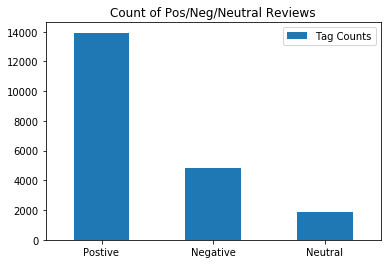

In [63]:
tag_count = df_make.Tag.value_counts().to_frame('Tag Counts')

tag_count.plot(y = 'Tag Counts', kind = 'bar',rot = False)
plt.title("Count of Pos/Neg/Neutral Reviews")
plt.show()

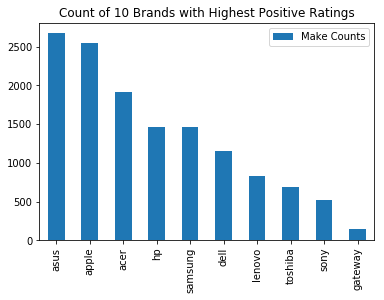

In [96]:
df_make_pos = df_make[(df_make['Tag'] == 'Postive')]

df_plot_pos = df_make_pos['Make'].value_counts()[:10].to_frame("Make Counts")

df_plot_pos.plot(y = 'Make Counts', kind = 'bar')
plt.title("Count of 10 Brands with Highest Positive Ratings")
plt.show()

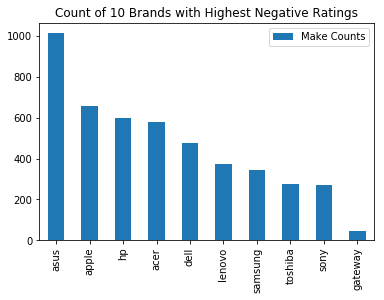

In [97]:
df_make_neg = df_make[(df_make['Tag'] == 'Negative')]

df_plot_neg = df_make_neg['Make'].value_counts()[:10].to_frame("Make Counts")

df_plot_neg.plot(y = 'Make Counts', kind = 'bar')
plt.title("Count of 10 Brands with Highest Negative Ratings")
plt.show()

In [108]:
df_tag_prop = df_plot_pos / df_plot_neg
df_tag_prop = df_tag_prop.rename(columns= {"Make Counts":"Ratio"})

In [109]:
df_tag_prop.sort_values([('Ratio')],ascending = False)

,Ratio
samsung,4.277778
apple,3.867982
acer,3.296552
gateway,2.979167
asus,2.639328
toshiba,2.509091
hp,2.454849
dell,2.407950
lenovo,2.221925
sony,1.904762


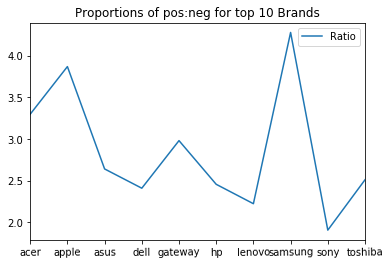

In [128]:
df_tag_prop.plot(y = 'Ratio', kind = 'line', rot = True)
plt.title("Proportions of pos:neg for top 10 Brands")
plt.show()

In [126]:
df_rev_counts = df_make.Make.value_counts()[:10].to_frame("Review Counts")